**Business Insights to gain from the dataset**

Profitability Analysis:


*   Gross profit margin analysis (Sales - Cost of Goods Sold).
*   Profit distribution across regions, countries, states, and cities.
*   Profitability by product category and sub-category.
*   Profit trend analysis over time.







Sales Performance Analysis:


*   Total sales revenue over time (daily, monthly, quarterly, yearly).
*   Sales distribution across different regions, countries, states, and cities.
*   Top-selling products and categories by revenue.
*   Sales trend analysis to identify seasonality or growth patterns.


Customer Analysis:


*   Customer segmentation based on purchase behavior (e.g., high-value, customers, frequent buyers).
*   Customer lifetime value (CLV) analysis.
*   Geographic analysis of customer distribution and sales.


Product Analysis:


*   Product performance analysis by sales volume and revenue.
*   Identification of top-selling products and slow-moving products.
*   Analysis of product profitability and contribution to overall profit.




Order Analysis:


*   Average order value (Sales per order).
*   Order frequency analysis (daily, weekly, monthly).
*   Analysis of shipping modes and their impact on sales and profitability.






Discount Analysis:


*   Impact of discounts on sales volume and revenue.
*   Discount effectiveness analysis (e.g., correlation between discount amount and sales increase).
*   Discount distribution across products and categories.








Inventory Management:

*   Inventory turnover rate analysis.
*   Identification of overstocked and understocked products.
*   Analysis of stockouts and their impact on sales and customer satisfaction.




Market Analysis:

*   Market share analysis compared to competitors.
*   Analysis of market penetration in different regions and customer segments.
*   Identification of potential growth opportunities in untapped markets.





Customer Satisfaction and Returns:

*   Analysis of return rates and reasons for returns.
*   Correlation between product quality, customer service, and customer satisfaction.
*   Impact of customer satisfaction on repeat purchases and customer loyalty.






Forecasting and Predictive Analytics:

*   Sales forecasting based on historical data and trends.
*   Predictive models for customer behavior, product demand, and sales performance.




In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sna
import sklearn.model_selection
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pyodbc



df= pd.read_excel("Superstore - Sales.xlsx")
label_encoder = LabelEncoder()
df['Customer ID']=label_encoder.fit_transform(df['Customer ID'])
df.to_csv("Store.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,143,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,143,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,237,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,705,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,705,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,737,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,21.1452
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,190,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,76.3268
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,190,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,239.1828
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,190,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,16.2800


In [236]:
df.shape
df.describe()

,Row ID,Order Date,Ship Date,Customer ID,Postal Code,Sales,Quantity,Discount,Profit,CoGS
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,400.460376,55190.379428,229.858001,3.789574,0.156203,28.656896,201.201105
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.554400
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,205.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,12.688200
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,405.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,41.664000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,602.000000,90008.000000,209.940000,5.000000,0.200000,29.364000,182.226300
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,792.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,24449.558400
std,2885.163629,NaN,NaN,228.585576,32063.693350,623.245101,2.225110,0.206452,234.260108,550.839414


In [142]:
df['Customer ID'].nunique()

793

In [143]:
df['Customer ID'].value_counts().sort_values()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   datetime64[ns]
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [215]:
label_encoder = LabelEncoder()
df['Customer ID']=label_encoder.fit_transform(df['Customer ID'])

df.to_csv("store.csv")

**Segmenting Cutomers based on Sales and Profitablity**

In [238]:
sales_segments = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_segments

,Customer ID,Sales,Profit
0,0,5563.560,-362.8825
1,1,1056.390,277.3824
2,2,1790.512,435.8274
3,3,5086.935,857.8033
4,4,886.156,129.3465
...,...,...,...
788,788,2374.658,621.2300
789,789,5454.350,1305.6290
790,790,6720.444,1778.2923
791,791,8025.707,-1032.1490


In [239]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sales_segments)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

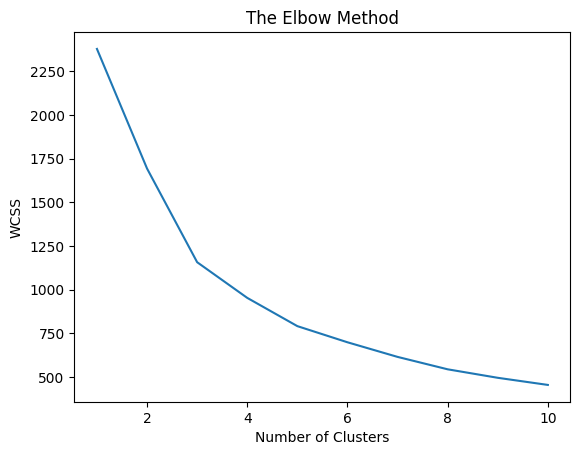

In [240]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.45856509697542874
For n_clusters = 3 The average silhouette_score is : 0.3850431652067324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.39510362506254987
For n_clusters = 5 The average silhouette_score is : 0.4084403681486859


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.36297527316593536


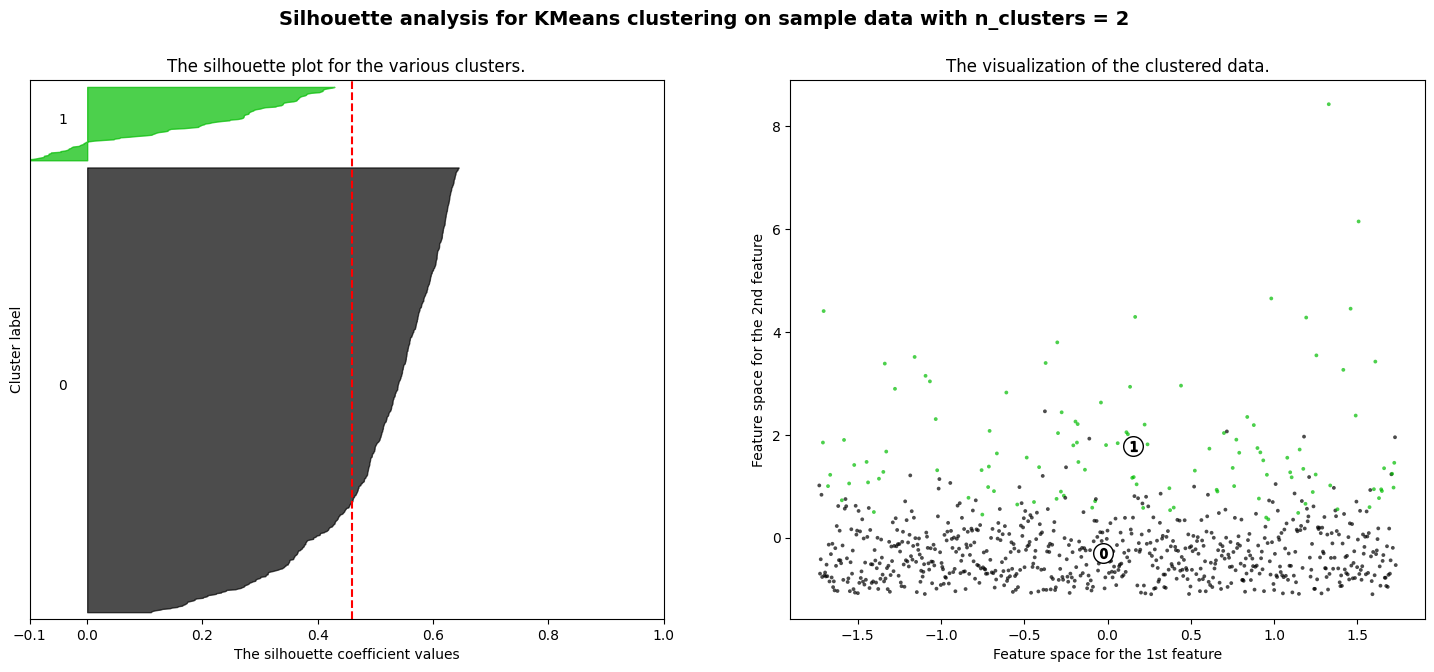

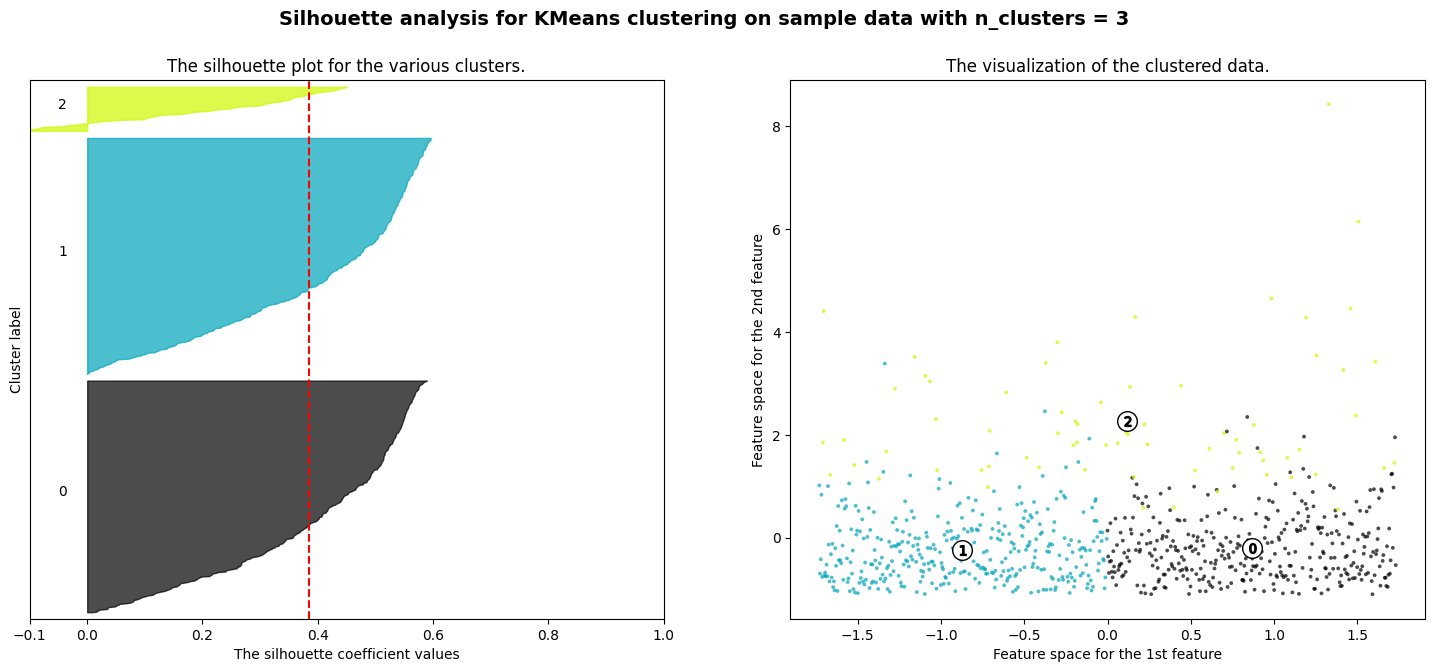

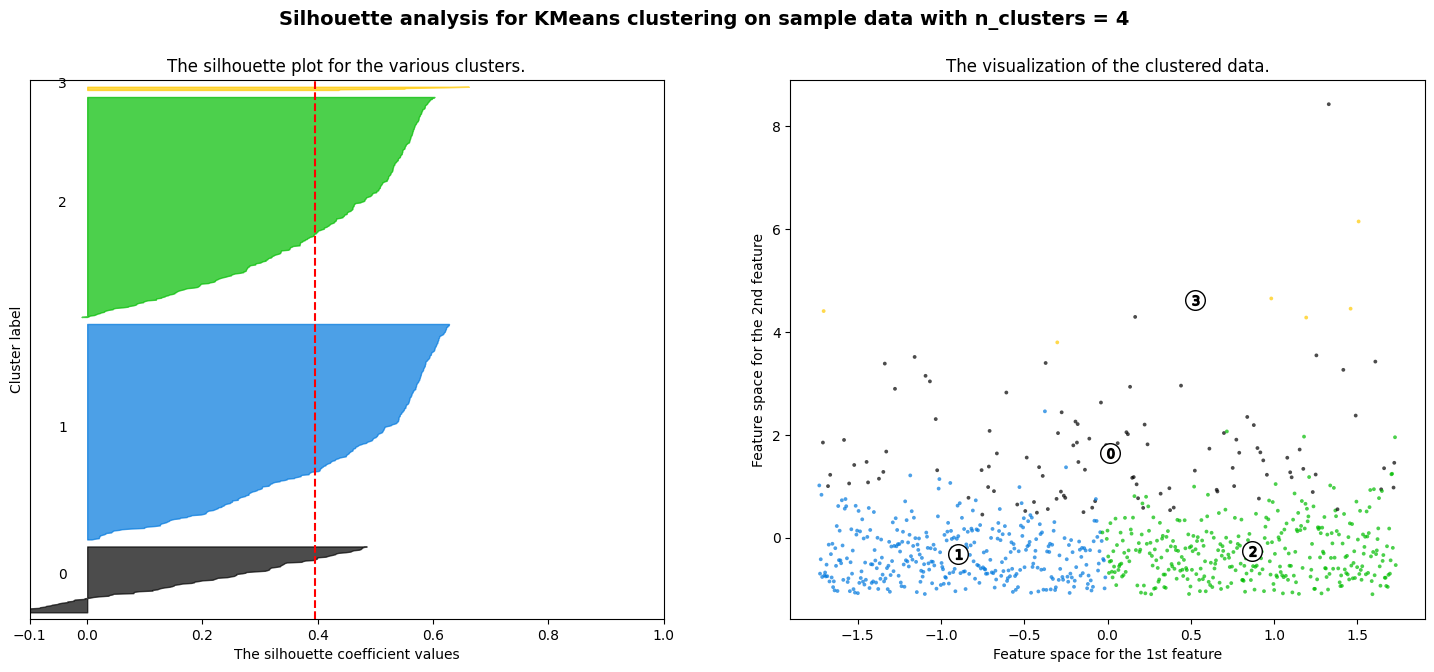

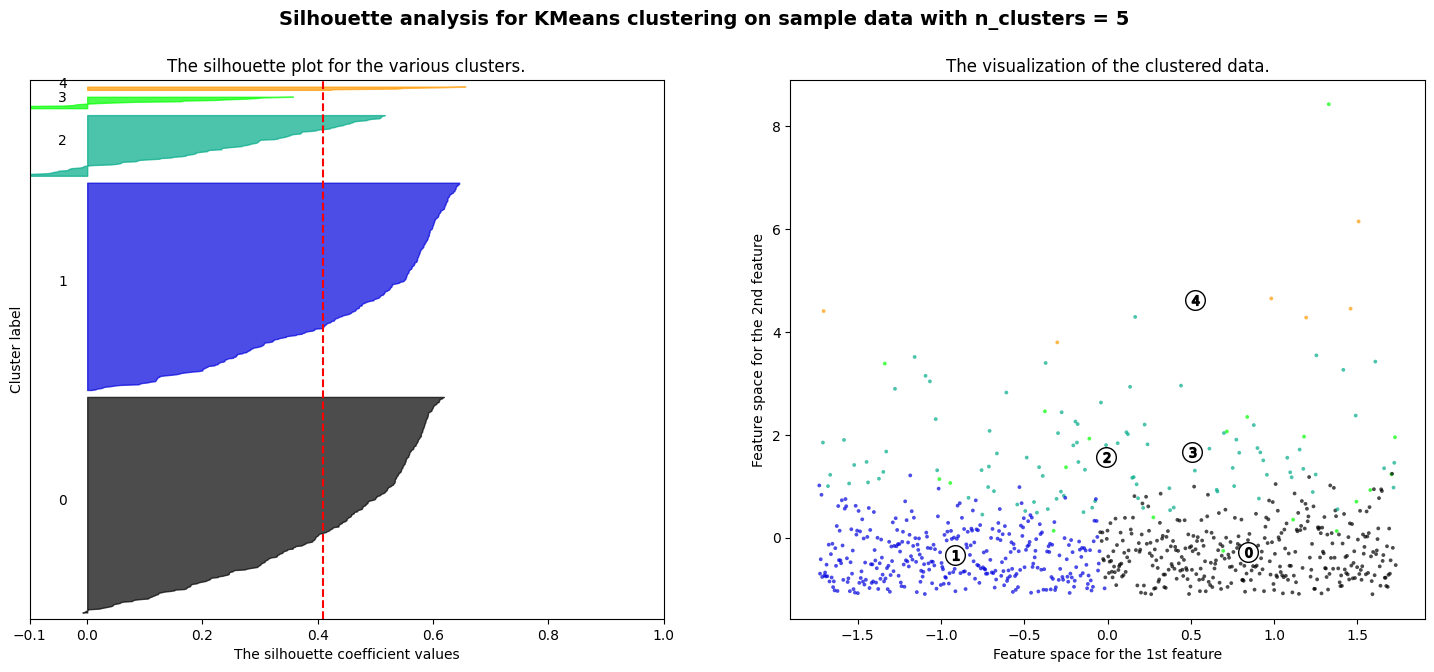

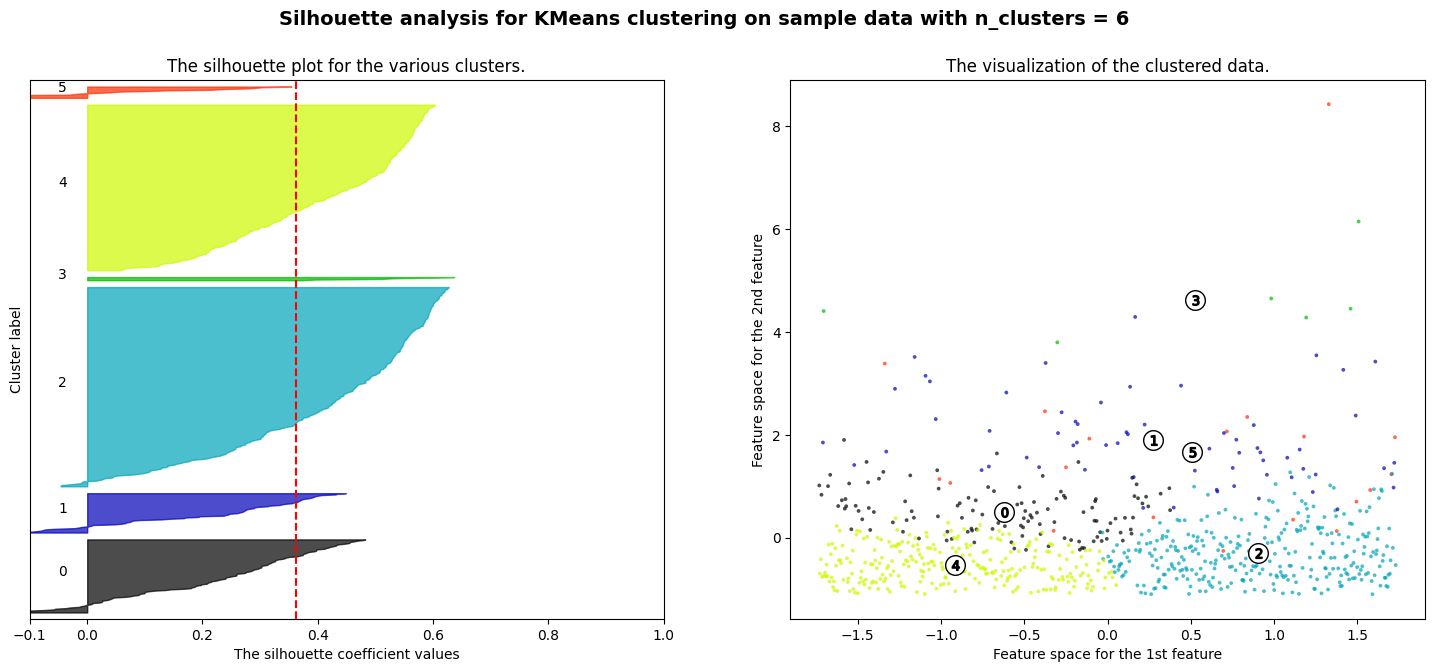

In [241]:
range_n_clusters = [2,3,4,5,6]

X = X_scaled

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [242]:
cluster = KMeans(n_clusters=2, random_state=10)
cluster_label = cluster.fit_predict(X_scaled)
sales_segments["cluster_labels"]=cluster_label
sales_segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer ID,Sales,Profit,cluster_labels
0,0,5563.560,-362.8825,0
1,1,1056.390,277.3824,0
2,2,1790.512,435.8274,0
3,3,5086.935,857.8033,0
4,4,886.156,129.3465,0
...,...,...,...,...
788,788,2374.658,621.2300,0
789,789,5454.350,1305.6290,1
790,790,6720.444,1778.2923,1
791,791,8025.707,-1032.1490,0


In [243]:
sales_segments.to_csv("sales_segments.csv")

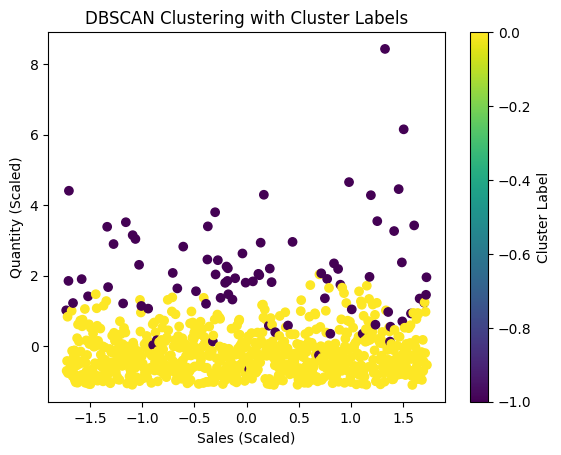

In [244]:
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X_scaled)

# Get cluster labels (-1 represents noise/outliers)
cluster_labels = dbscan.labels_

# Visualize clusters with cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Sales (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.title('DBSCAN Clustering with Cluster Labels')
plt.colorbar(label='Cluster Label')
plt.show()

**Segment customers based on order frequency and recency**

In [245]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
order_frequency = df.groupby('Customer ID')['Order Date'].agg(['min', 'max', 'count']).reset_index()
order_frequency.columns = ['Customer ID', 'FirstOrderDate', 'LastOrderDate', 'OrderCount']
order_frequency['OrderRecency'] = (order_frequency['LastOrderDate'] - order_frequency['FirstOrderDate']).dt.days
pd.to_datetime(order_frequency['FirstOrderDate'])
pd.to_datetime(order_frequency['LastOrderDate'])
order_frequency.info()


# Duplicate copy to export the data
df['Order Date'] = pd.to_datetime(df['Order Date'])
order_frequency1 = df.groupby('Customer ID')['Order Date'].agg(['min', 'max', 'count']).reset_index()
order_frequency1.columns = ['Customer ID', 'FirstOrderDate', 'LastOrderDate', 'OrderCount']
order_frequency1['OrderRecency'] = (order_frequency1['LastOrderDate'] - order_frequency1['FirstOrderDate']).dt.days
pd.to_datetime(order_frequency1['FirstOrderDate'])
pd.to_datetime(order_frequency1['LastOrderDate'])
order_frequency1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer ID     793 non-null    int64         
 1   FirstOrderDate  793 non-null    datetime64[ns]
 2   LastOrderDate   793 non-null    datetime64[ns]
 3   OrderCount      793 non-null    int64         
 4   OrderRecency    793 non-null    int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 31.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer ID     793 non-null    int64         
 1   FirstOrderDate  793 non-null    datetime64[ns]
 2   LastOrderDate   793 non-null    datetime64[ns]
 3   OrderCount      793 non-null    int64         
 4   OrderRecency    793 non-null    int64         
dtypes

In [246]:
order_frequency["FirstOrderDate"] = order_frequency["FirstOrderDate"].apply(lambda x: x.toordinal())
order_frequency["LastOrderDate"] = order_frequency["LastOrderDate"].apply(lambda x: x.toordinal())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(order_frequency)
X_scaled

array([[-1.72986801, -0.87837485, -0.19988856, -0.25691161,  0.60175909],
       [-1.72549965, -0.79586045,  0.68676201,  0.38425569,  1.06676381],
       [-1.7211313 , -0.7447801 , -0.60291154, -0.09661979,  0.24977634],
       ...,
       [ 1.7211313 ,  0.24932204,  0.74049841, -0.09661979,  0.24008874],
       [ 1.72549965, -0.10824039,  0.49868462,  2.9489249 ,  0.38863192],
       [ 1.72986801, -0.29291549, -0.29661407, -0.57749527,  0.06248277]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

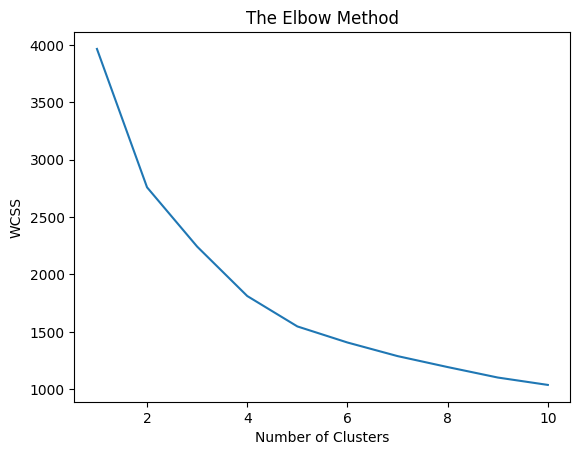

In [247]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [248]:
cluster = KMeans(n_clusters=3, random_state=10)
cluster_label = cluster.fit_predict(X_scaled)
order_frequency1["cluster_label"] = cluster_label
order_frequency1.to_csv("order_frequency.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.340192242998526
For n_clusters = 3 The average silhouette_score is : 0.3571956702718399


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2665895133502564


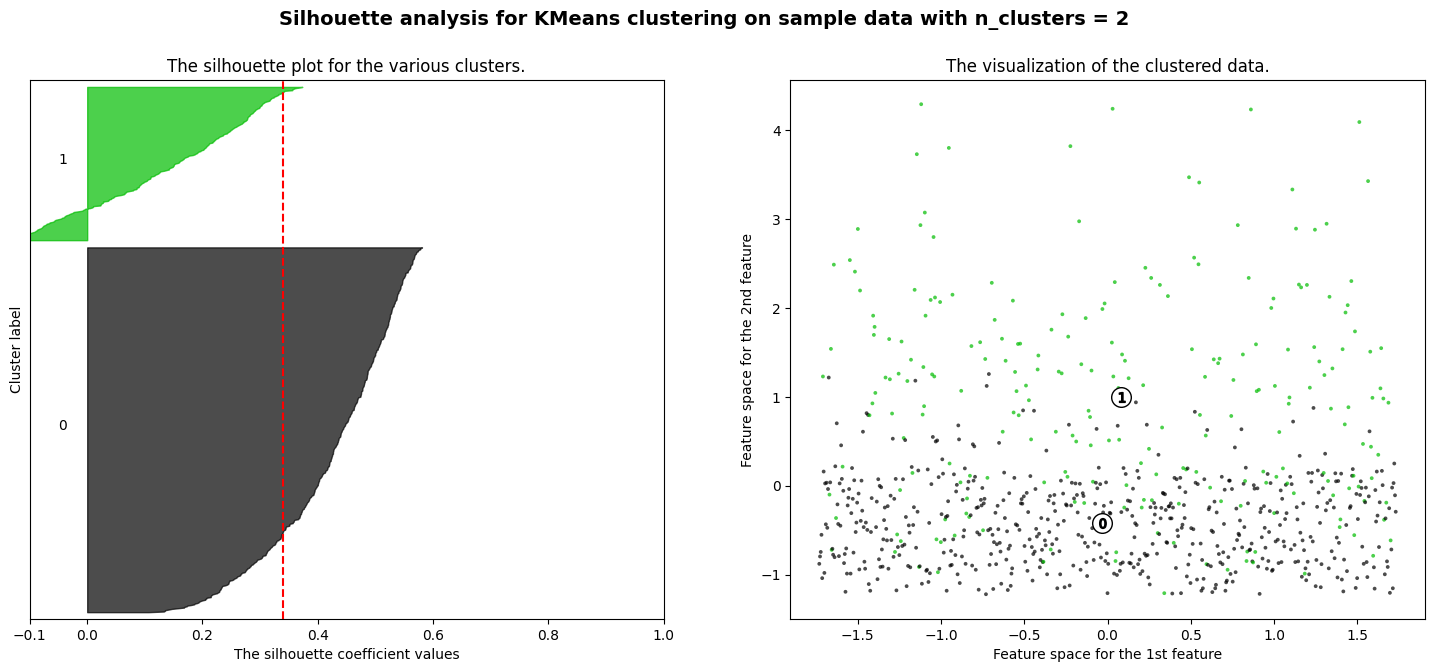

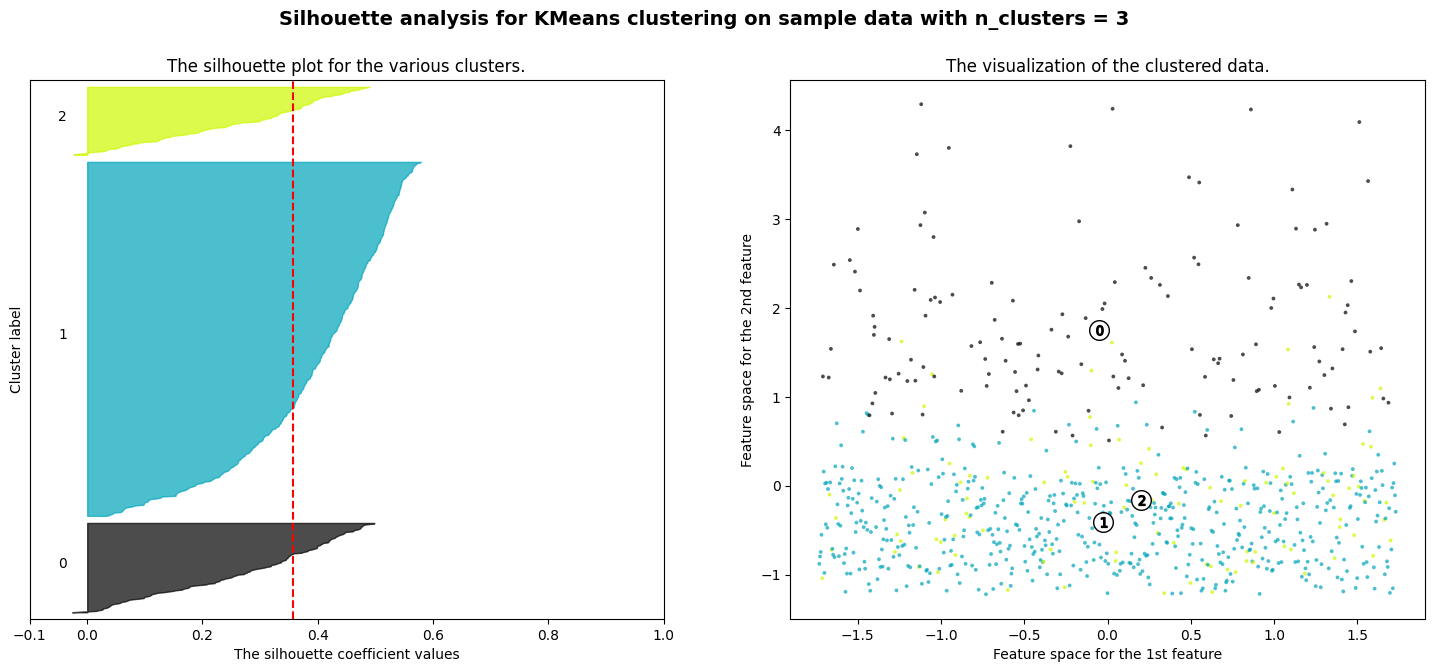

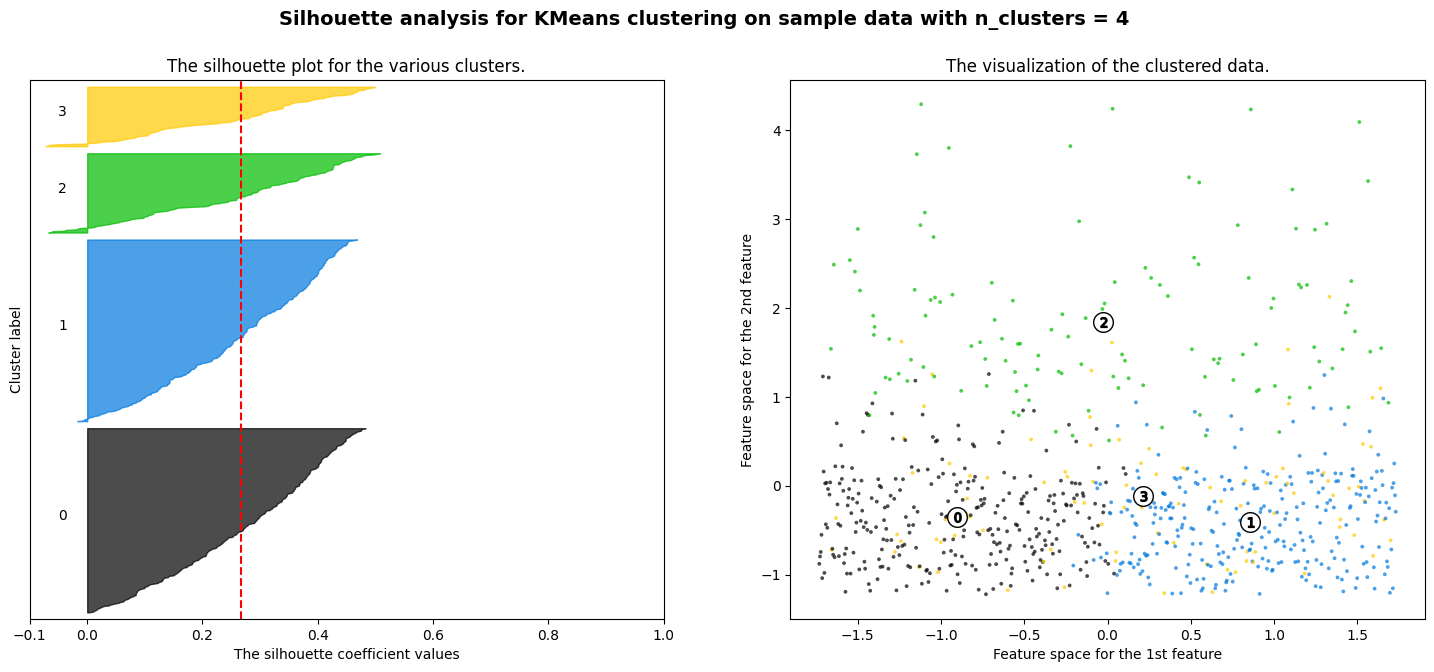

In [249]:
range_n_clusters = [2,3,4]

X = X_scaled
y= cluster_label

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [208]:
# order_frequency["FirstOrderDate"] = pd.to_datetime(order_frequency["FirstOrderDate"])
# order_frequency["LastOrderDate"] = pd.to_datetime(order_frequency["LastOrderDate"])


# order_frequency.to_csv("order_frequency.csv")
# order_frequency

,Customer ID,FirstOrderDate,LastOrderDate,OrderCount,OrderRecency,cluster_label
0,0,1970-01-01 00:00:00.000735323,1970-01-01 00:00:00.000736509,11,1186,1
1,1,1970-01-01 00:00:00.000735344,1970-01-01 00:00:00.000736674,15,1330,1
2,2,1970-01-01 00:00:00.000735357,1970-01-01 00:00:00.000736434,12,1077,1
3,3,1970-01-01 00:00:00.000735406,1970-01-01 00:00:00.000736638,18,1232,1
4,4,1970-01-01 00:00:00.000735282,1970-01-01 00:00:00.000736278,6,996,2
...,...,...,...,...,...,...
788,788,1970-01-01 00:00:00.000735253,1970-01-01 00:00:00.000736650,28,1397,1
789,789,1970-01-01 00:00:00.000735554,1970-01-01 00:00:00.000736689,8,1135,1
790,790,1970-01-01 00:00:00.000735610,1970-01-01 00:00:00.000736684,12,1074,1
791,791,1970-01-01 00:00:00.000735519,1970-01-01 00:00:00.000736639,31,1120,1


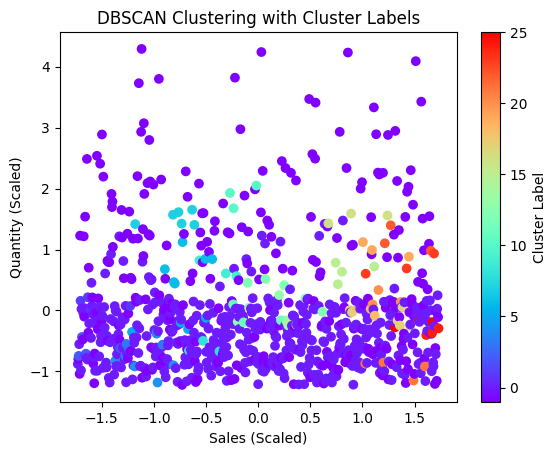

In [250]:
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 3  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X_scaled)

# Get cluster labels (-1 represents noise/outliers)
cluster_labels = dbscan.labels_

# Visualize clusters with cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Sales (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.title('DBSCAN Clustering with Cluster Labels')
plt.colorbar(label='Cluster Label')
plt.show()

**Segment customers based on product categories**

In [259]:
category_segments = df.groupby(['Customer ID','Category', 'Sub-Category']).size().reset_index(name='ProductCount')

category_segments

category_segments1 = df.groupby(['Customer ID','Category', 'Sub-Category']).size().reset_index(name='ProductCount')
category_segments1.shape

(6002, 4)

In [260]:
category_segments = pd.get_dummies(category_segments, columns=['Category', 'Sub-Category'])
category_segments

,Customer ID,ProductCount,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,2,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,792,1,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,792,1,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5999,792,1,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6000,792,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [261]:
for i in category_segments.columns:
  if i.startswith("Sub") or i.startswith("Category"):
    category_segments[i] = category_segments[i].map(lambda x: 1 if x else 0)
category_segments

,Customer ID,ProductCount,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,2,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,792,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,792,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5999,792,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6000,792,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [262]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(category_segments)
X_scaled

array([[-1.73529405, -0.6486311 ,  1.82068157, ..., -0.3060374 ,
        -0.16549284, -0.21321928],
       [-1.73529405,  0.32659031, -0.54924486, ..., -0.3060374 ,
        -0.16549284, -0.21321928],
       [-1.73529405,  0.32659031, -0.54924486, ..., -0.3060374 ,
        -0.16549284, -0.21321928],
       ...,
       [ 1.72051289, -0.6486311 , -0.54924486, ..., -0.3060374 ,
        -0.16549284, -0.21321928],
       [ 1.72051289, -0.6486311 , -0.54924486, ..., -0.3060374 ,
        -0.16549284, -0.21321928],
       [ 1.72051289,  1.30181172, -0.54924486, ..., -0.3060374 ,
        -0.16549284, -0.21321928]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

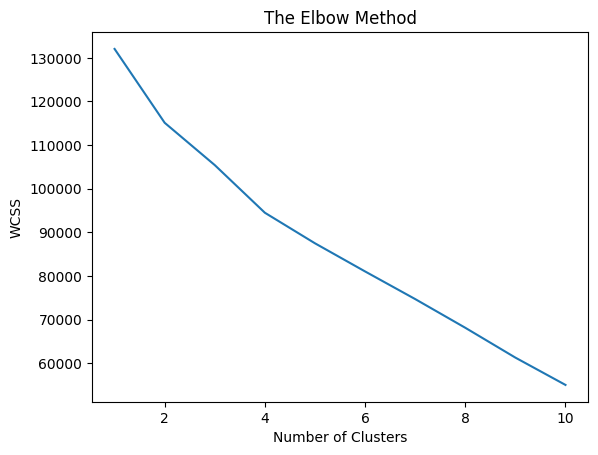

In [263]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.17441889371827846


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2377086561013608


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.1986197983409536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.23814055836909304


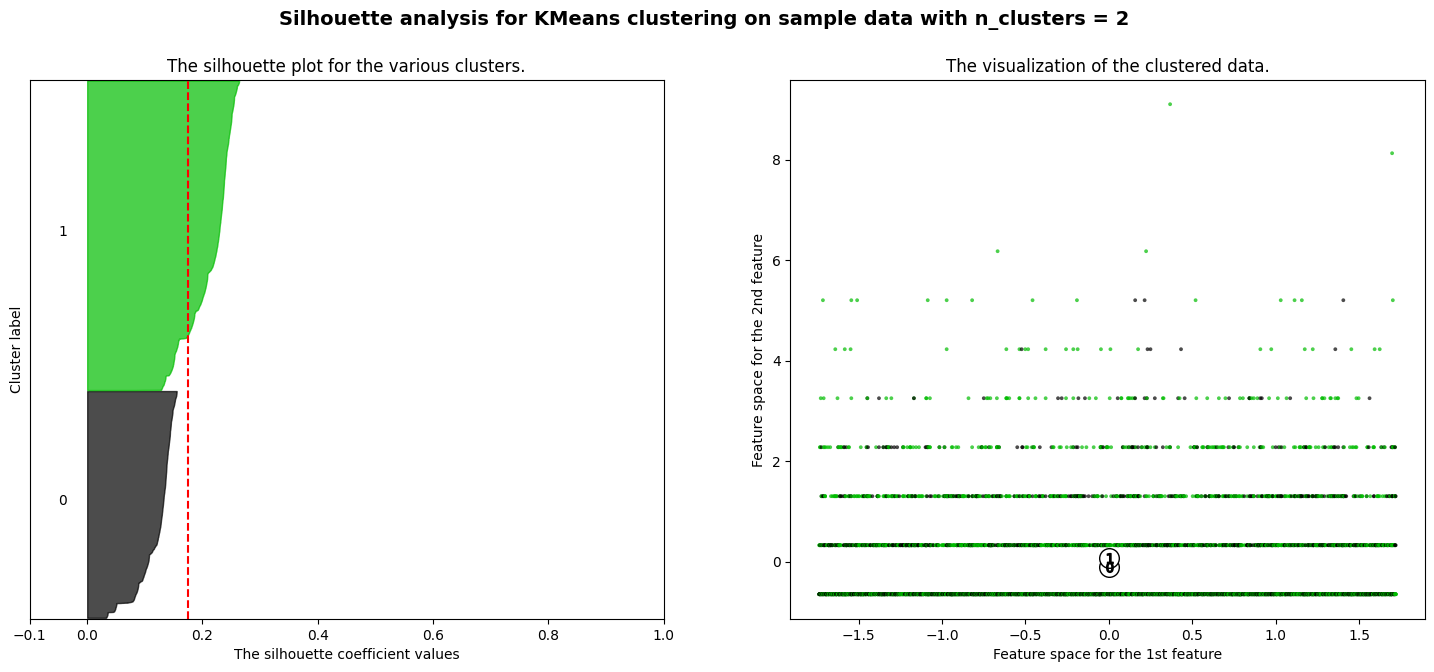

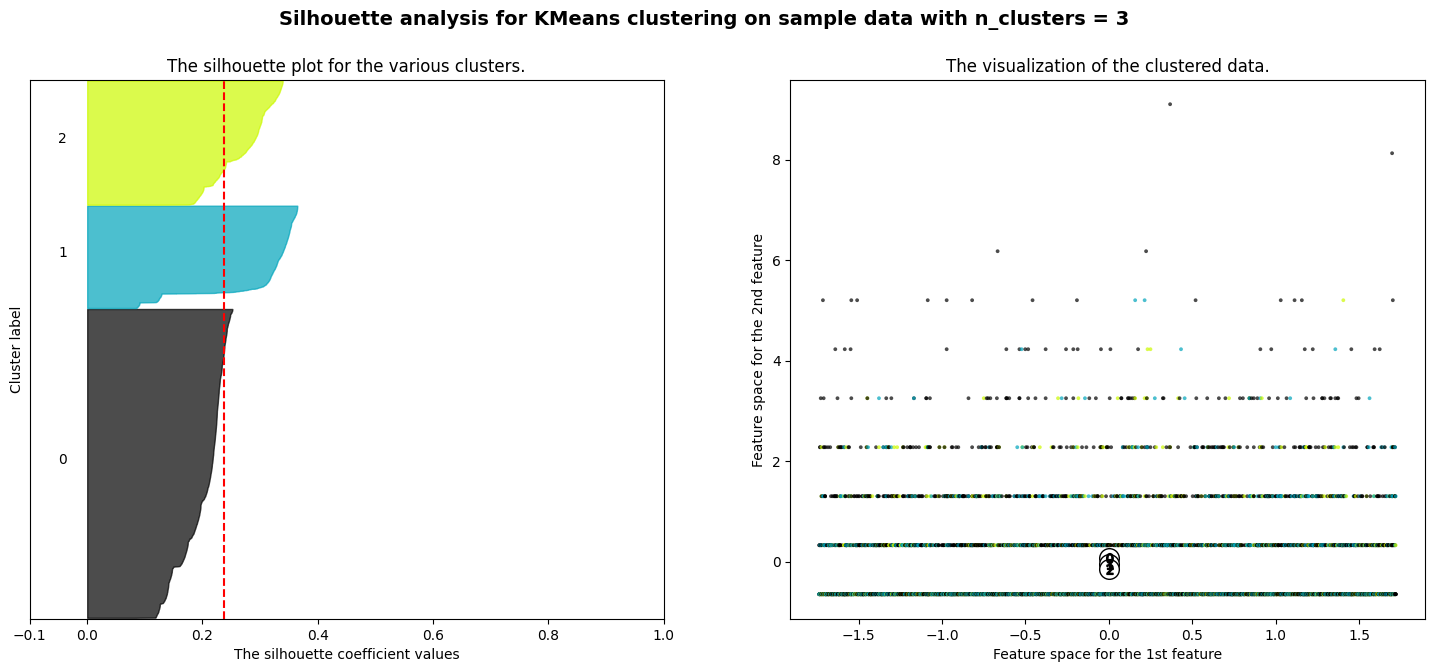

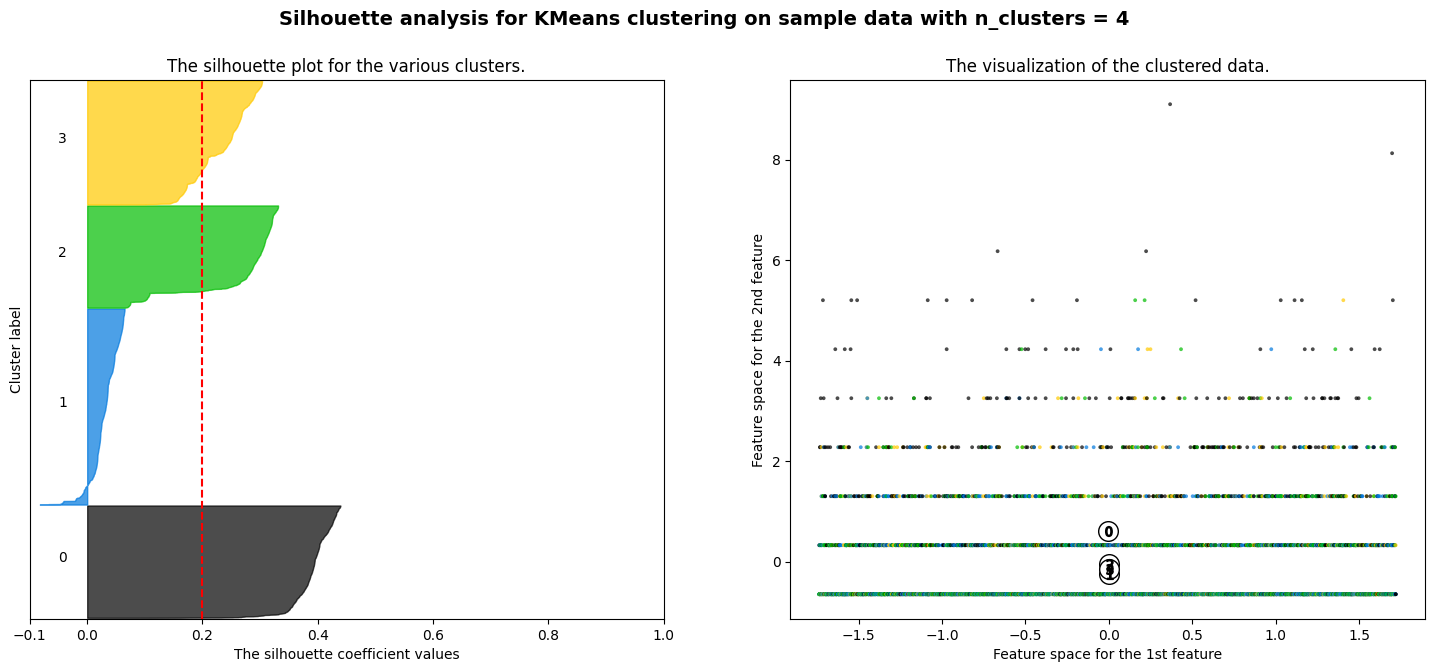

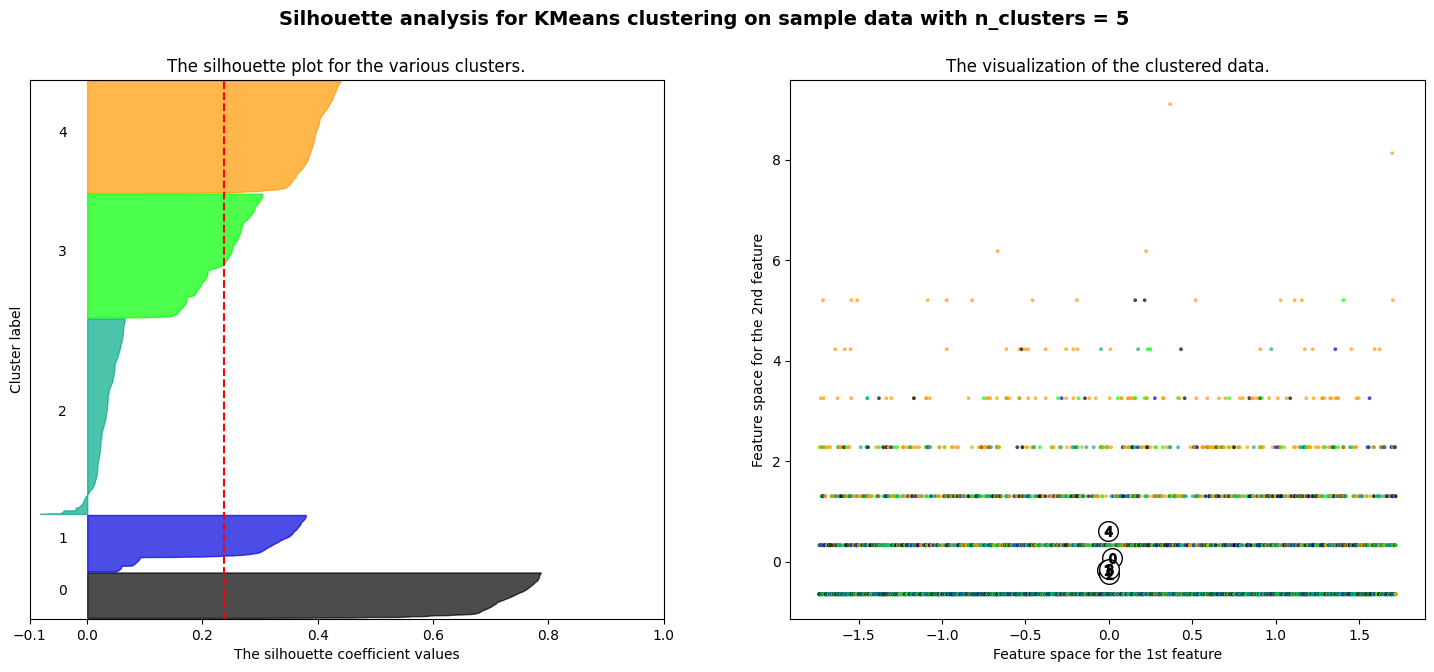

In [264]:
range_n_clusters = [2,3,4,5]

X = X_scaled
y= cluster_label

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [265]:
cluster = KMeans(n_clusters=3, random_state=10)
cluster_label = cluster.fit_predict(X_scaled)

category_segments1["cluster_label"] = cluster_label
category_segments1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer ID,Category,Sub-Category,ProductCount,cluster_label
0,0,Furniture,Furnishings,1,2
1,0,Office Supplies,Appliances,2,0
2,0,Office Supplies,Binders,2,0
3,0,Office Supplies,Fasteners,1,0
4,0,Office Supplies,Paper,1,0
...,...,...,...,...,...
5997,792,Office Supplies,Appliances,1,0
5998,792,Office Supplies,Art,1,0
5999,792,Office Supplies,Binders,1,0
6000,792,Office Supplies,Paper,1,0


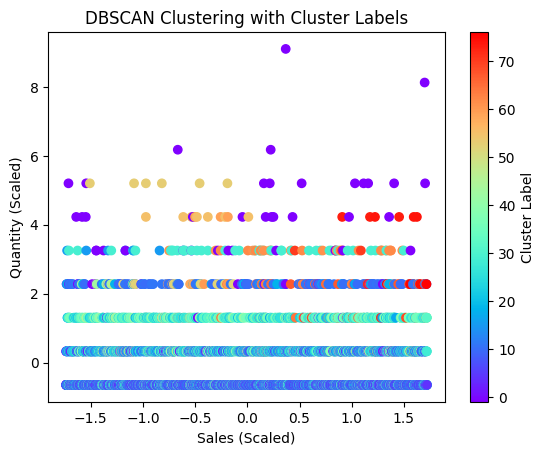

In [188]:
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 3  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X_scaled)

# Get cluster labels (-1 represents noise/outliers)
cluster_labels = dbscan.labels_

# Visualize clusters with cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Sales (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.title('DBSCAN Clustering with Cluster Labels')
plt.colorbar(label='Cluster Label')
plt.show()

In [266]:
category_segments1.to_csv("category_segments.csv")

import os
print(os.getcwd())

/content


In [163]:
# # df= df.drop(['Row ID','Order ID','Order Date','Ship Date','Country','City','Postal Code','Product Name','State'],inplace=True, axis=1)
# df= pd.get_dummies(df, columns=['Category', 'Region'])
# label_encoder = LabelEncoder()
# df['Customer ID']=label_encoder.fit_transform(df['Customer ID'])

# # df1 = df[['Row ID','Order ID','Order Date','Ship Date','Country','City','Postal Code','Product Name','State','Sub-Category','Order Date']]
# # df=df[['Sales', 'Quantity','Profit','Category','Region','Customer ID',]]
# # df.columns
# df1 = df[['Row ID','Order ID','Order Date','Ship Date','Country','City','Postal Code','Product Name','State','Sub-Category','Order Date']]
# # df=df[['Sales', 'Quantity','Profit','Customer ID', 'Category_Furniture', 'Category_Office Supplies','Category_Technology', 'Region_Central', 'Region_East', 'Region_South','Region_West']]


# df=df[['Sales', 'Quantity','Profit','Customer ID','Discount','CoGS']]

# df

In [164]:
# df['Category_Furniture'] = df['Category_Furniture'].map(lambda x: 1 if x else 0)
# df['Category_Office Supplies'] = df['Category_Office Supplies'].map(lambda x: 1 if x else 0)
# df['Category_Technology'] = df['Category_Technology'].map(lambda x: 1 if x else 0)
# df['Region_Central'] = df['Region_Central'].map(lambda x: 1 if x else 0)
# df['Region_East'] = df['Region_East'].map(lambda x: 1 if x else 0)
# df['Region_South'] = df['Region_South'].map(lambda x: 1 if x else 0)
# df['Region_West'] = df['Region_West'].map(lambda x: 1 if x else 0)

In [ ]:
# con = pyodbc.connect(
#     r"Driver= {ODBC Driver 17 for SQL Server};"
#     r"Server=SUKUMAR\SQLEXPRESS;"
#     r"Database=SuperStore;"
#     r"Trusted_Connection=yes;"
# )

# def getData(con,table_name):
#     cursor = con.cursor()
#     cursor.execute(f"select * from {table_name}")
#     for row in cursor:
#         print(row)
#     con.commit()

    
# def insertData(con, df, table_name):
#     cursor = con.cursor()

#     sqlq = f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES ({', '.join(['?'] * len(df.columns))})"

#     for index, row in df.iterrows():
#         values = tuple(row)
#         cursor.execute(sqlq, values)
#     con.commit()

# insertData(con,df,'dbo.sales');

# getData(con);


In [201]:
import pyodbc
import pandas as pd


con = pyodbc.connect(
    r"Driver= {ODBC Driver 17 for SQL Server};"
    r"Server=SUKUMAR\SQLEXPRESS;"
    r"Database=SuperStore;"
    r"Trusted_Connection=yes;"
)

df =  pd.read_csv("C:/Users/Chugu/Downloads/category_segments.csv")
# df = df.head(5)


def getData(con):
    cursor = con.cursor()
    cursor.execute("select * from dbo.category")
    print(f"{cursor.rowcount} has been inserted")
    con.commit()

    
def insertData(con, df, table_name):
    cursor = con.cursor()

    sqlq = f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES ({', '.join(['?'] * len(df.columns))})"

    for index, row in df.iterrows():
        values = tuple(row)
        cursor.execute(sqlq, values)
    con.commit()

insertData(con,df,'dbo.category');

getData(con);




Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 17 for SQL Server' : file not found (0) (SQLDriverConnect)")

In [ ]:


# con = pyodbc.connect(
#     "Driver= {ODBC Driver 17 for SQL Server};"
#     "Server=SUKUMAR\SQLEXPRESS;"
#     "Database=SuperStore;"
#     "Trusted_Connection=yes;"
# )

# def getData(con):
#     cursor = con.cursor()
#     cursor.execute("select * from dbo.salesMaster")
#     for row in cursor:
#         print(row)

# def insertData(con):
#     print("Hello")

#     cursor =  con.cursor()
#     cursor.execute(
#         'insert into dbo.salesMaster  (PID, Pname, PSales) values(?,?,?) ',
#         (4,'PS5',45000)
#     )
# insertData(con);
# getData(con);